In [5]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
from sklearn.cluster import KMeans

### Find location of centre of optic disc

1


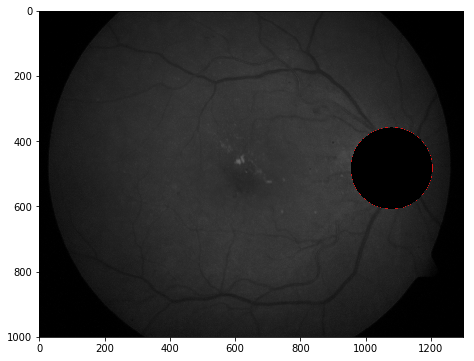

1078 483


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import data, color
from skimage.io import imread, imshow
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
import cv2

# Load picture and detect edges
im = imread('ODmasked-image-274.png')
image = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)


# Detect two radii
hough_radii = np.arange(100, 200, 5)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 5 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=1)
print(len(radii))
# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 6))
imagea = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    imagea[circy, circx] = (220, 20, 20)

ax.imshow(imagea, cmap=plt.cm.gray)
plt.show()
print(center_x, center_y)

C:\Users\Alex\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


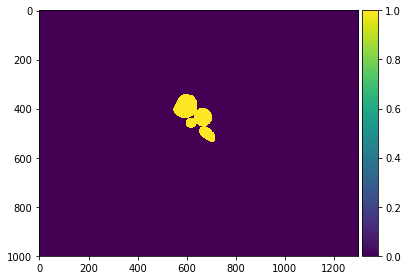

In [8]:
import matplotlib.pyplot as plt
imGT = imread('resized-image-274.png')
imGTGrey = cv2.cvtColor(imGT, cv2.COLOR_BGR2GRAY)
#imshow(imGTGrey)

# topGroup = 
#print(len(imGTGrey[imGTGrey >= 100]))
imGTGrey[imGTGrey < 225 ] = 0
imGTGrey[imGTGrey >= 225] = 1
imshow(imGTGrey)



In [9]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
import csv
position = 0 #left

img_ent = entropy(image, disk(5))


if center_x >= 650:
    position = 1 #right

pixelDicts = []
distances = np.zeros(image.shape[0:2])
for x in range(distances.shape[0]):
    for y in range(distances.shape[1]):
        distance = np.sqrt((x-center_x)**2+(y-center_y)**2)
        pixelDict = {'x':x,'y':y, #coordinates, not used in classification, just for matching up with ground truths
                     'r':im[x,y][0],'g':im[x,y][1],'b':im[x,y][2], #rgb values
                     "Left/Right (0/1)": position,
                     'Distance From Disc':distance, 'Entropy':img_ent[x,y],
                     'Exudate Pixel': imGTGrey[x,y] }
        pixelDicts.append(pixelDict)
keys = pixelDicts[0].keys()
with open('image274.csv', 'w',newline='') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(pixelDicts)

In [10]:
#Feature Functions
def subsection(image,start_y,start_x,dimension_y,dimension_x):
    s_image = image[start_y:(start_y+dimension_y),start_x:(start_x+dimension_x)]
    imshow(s_image)
    return s_image


def leftRight(x_pixel):
    if x_pixel <= 650:
        return 1
    else:
        return 0
    

# def distances(greyimage, y_center, x_center):
#     distances = np.zeros(greyimage.shape)
#     for y in range(distances.shape[0]):
#         for x in range(distances.shape[1]):
#             distances[y,x] = np.sqrt((y-y_center)**2+(x-x_center)**2) 
#     return np.amin(distances), np.amax(distances),np.mean(distances) 
    
    

def get_entropy(greyimage): #takes 2D numpy array
    return entropy(greyimage)

def dominant_pixels(image): #image must be coloured image
    rd_pixels = 0
    gd_pixels = 0
    bd_pixels = 0
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            if (image[y,x][0] > 225 and image[y,x][1] < 75 and image[y,x][2] < 75):
                rd_pixels += 1
            if (image[y,x][1] > 200 and image[y,x][0] < 100 and image[y,x][2] < 100):
                gd_pixels += 1
            if (image[y,x][2] > 225 and image[y,x][0] < 100 and image[y,x][1] < 100):
                bd_pixels += 1
    return rd_pixels, gd_pixels, bd_pixels
                

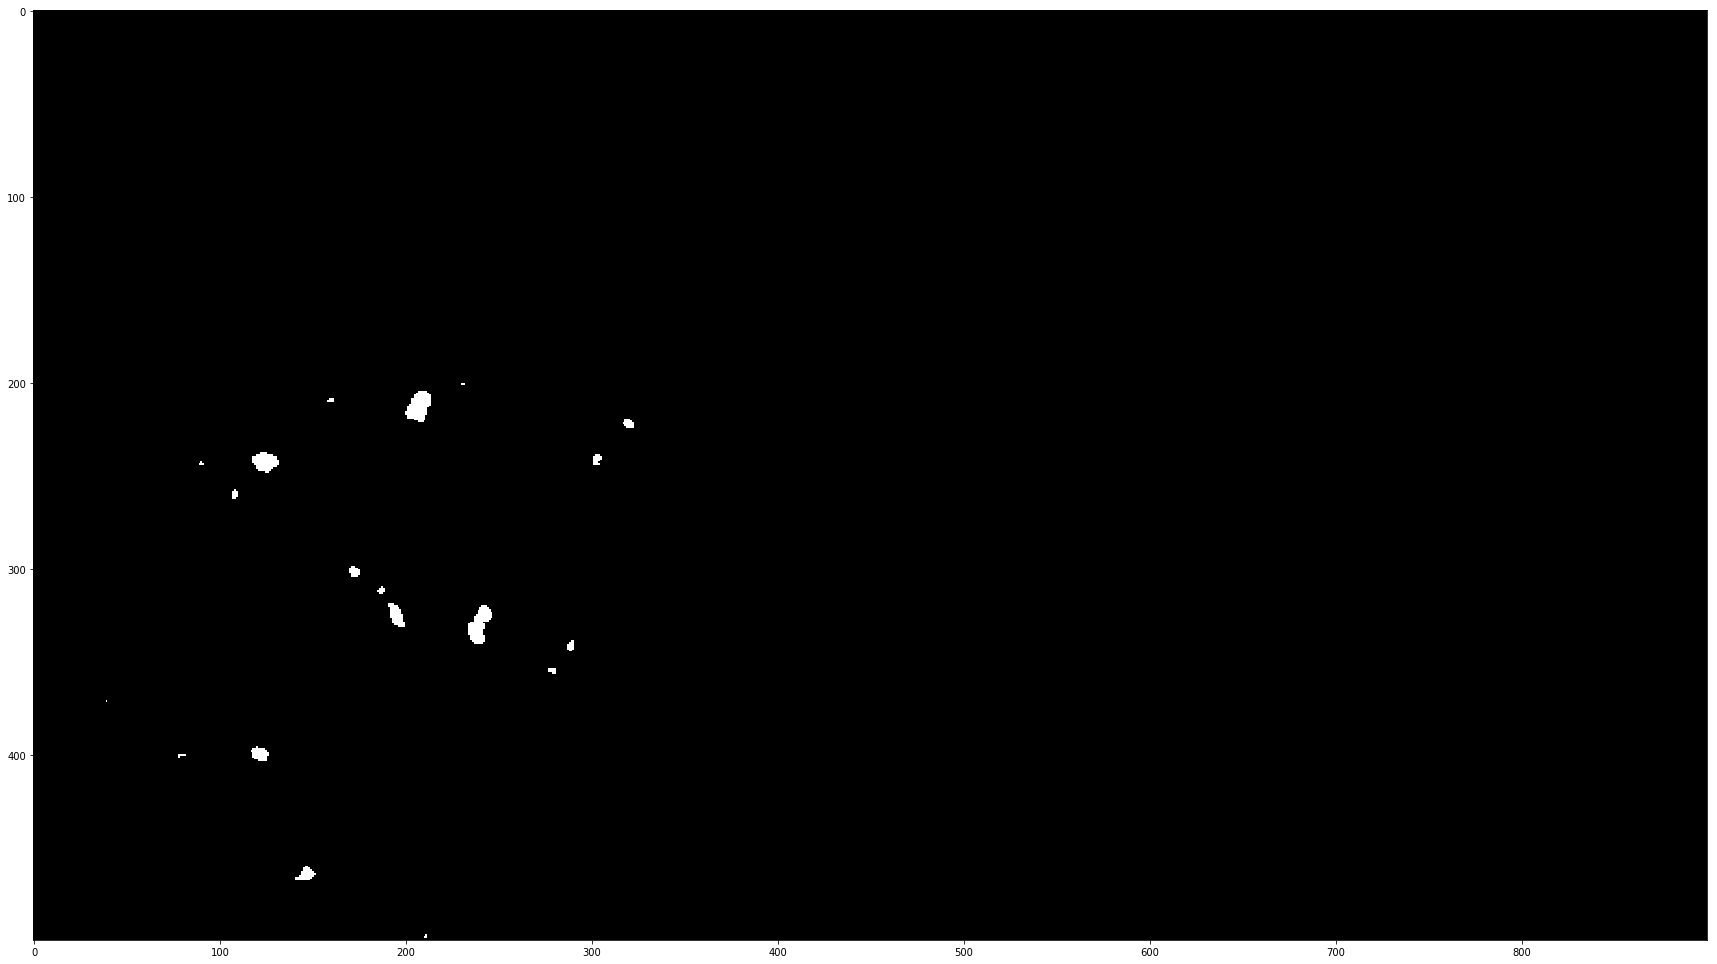

In [12]:
import collections
from statistics import mean
im289 = imread('E:/Users/Alex/Dropbox/MEng Software/Winter-Term-2019/Big Data/Project/clusters-cropped/cluster-ODmasked-image-298.png')
#print(np.size(np.where(im289 == 100)))
#print(collections.Counter(im289))



#check if cluster has <10000 pixels if it does -> exudates
def exudate_image(image,max_pixels):
    cluster_values = np.unique(image)
    pixel_values = []
    for cv in cluster_values:
        amount = np.size(np.where(image == cv))
        if amount < max_pixels:
            pixel_values.append(cv)
    if len(pixel_values) > 0:
        pv = min(pixel_values)
        image[np.where(image != pv)] = 0
        image[np.where(image == pv)] = 255
    else:
        image[:,:] = 0
    return image

def count_exudates(image):
    count = np.size(np.where(image == 255))
    return count

def distances(image, center_y, center_x):
    min_dist = 0
    max_dist = 0
    avg_dist = 0
        
    rows,columns = np.where(image == 255)
    if len(rows) > 0:
        distances = []
        locations = zip(rows,columns)
        for l in locations:
            y = l[0]
            x = l[1]
            dist = np.sqrt((y-center_y)**2+(x-center_x)**2)
            distances.append(dist)
        min_dist = min(distances)
        max_dist = max(distances)
        avg_dist = mean(distances)
    
    return min_dist, max_dist, avg_dist
        
im289 = exudate_image(im289,10000)
count = count_exudates(im289)
distances(im289,1,1)
min_dist, max_dist, avg_dist = distances(im289,498,211)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(30, 20))
ax.imshow(im289, cmap=plt.cm.gray)
plt.show()
#imshow(im289)

### Load Subsection Dimensions

ODmasked-image-1.png
9604
ODmasked-image-10.png
0
ODmasked-image-100.png
0
ODmasked-image-1000.png
218
ODmasked-image-1001.png
76
ODmasked-image-1002.png
116
ODmasked-image-1003.png
126
ODmasked-image-1004.png
626
ODmasked-image-1005.png
162
ODmasked-image-1006.png
1220
ODmasked-image-1007.png
3606
ODmasked-image-1008.png
454
ODmasked-image-1009.png
530
ODmasked-image-101.png
0
ODmasked-image-1010.png
626
ODmasked-image-1011.png
384
ODmasked-image-1012.png
278
ODmasked-image-1013.png
140
ODmasked-image-1014.png
16
ODmasked-image-1015.png
20
ODmasked-image-1016.png
198
ODmasked-image-1017.png
102
ODmasked-image-1018.png
32
ODmasked-image-1019.png
8006
ODmasked-image-102.png
0
ODmasked-image-1020.png
8
ODmasked-image-1021.png
994
ODmasked-image-1022.png
6
ODmasked-image-1023.png
4
ODmasked-image-1024.png
1204
ODmasked-image-1025.png
78
ODmasked-image-1026.png
88
ODmasked-image-1027.png
80
ODmasked-image-1028.png
32
ODmasked-image-1029.png
82
ODmasked-image-103.png
0
ODmasked-image-1030.p

ODmasked-image-1268.png
336
ODmasked-image-1269.png
2
ODmasked-image-127.png
0
ODmasked-image-1270.png
224
ODmasked-image-1271.png
154
ODmasked-image-1272.png
156
ODmasked-image-1273.png
40
ODmasked-image-1274.png
238
ODmasked-image-1275.png
46
ODmasked-image-1276.png
194
ODmasked-image-1277.png
150
ODmasked-image-1278.png
180
ODmasked-image-1279.png
2540
ODmasked-image-128.png
0
ODmasked-image-1280.png
152
ODmasked-image-1281.png
114
ODmasked-image-1282.png
1292
ODmasked-image-1283.png
4
ODmasked-image-1284.png
214
ODmasked-image-1285.png
94
ODmasked-image-1286.png
142
ODmasked-image-1287.png
0
ODmasked-image-1288.png
2834
ODmasked-image-1289.png
440
ODmasked-image-129.png
10
ODmasked-image-1290.png
322
ODmasked-image-1291.png
2262
ODmasked-image-1292.png
94
ODmasked-image-1293.png
1706
ODmasked-image-1294.png
4
ODmasked-image-1295.png
664
ODmasked-image-1296.png
2
ODmasked-image-1297.png
232
ODmasked-image-1298.png
278
ODmasked-image-1299.png
142
ODmasked-image-13.png
9026
ODmasked-i

ODmasked-image-1534.png
6496
ODmasked-image-1535.png
142
ODmasked-image-1536.png
512
ODmasked-image-1537.png
3078
ODmasked-image-1538.png
1282
ODmasked-image-1539.png
2330
ODmasked-image-154.png
0
ODmasked-image-1540.png
560
ODmasked-image-1541.png
692
ODmasked-image-1542.png
158
ODmasked-image-1543.png
744
ODmasked-image-1544.png
586
ODmasked-image-1545.png
18
ODmasked-image-1546.png
5468
ODmasked-image-1547.png
4418
ODmasked-image-1548.png
58
ODmasked-image-1549.png
404
ODmasked-image-155.png
0
ODmasked-image-1550.png
900
ODmasked-image-1551.png
498
ODmasked-image-1552.png
514
ODmasked-image-1553.png
2
ODmasked-image-1554.png
1322
ODmasked-image-1555.png
688
ODmasked-image-1556.png
1980
ODmasked-image-1557.png
162
ODmasked-image-1558.png
164
ODmasked-image-1559.png
604
ODmasked-image-156.png
0
ODmasked-image-1560.png
8618
ODmasked-image-1561.png
2278
ODmasked-image-1562.png
606
ODmasked-image-1563.png
640
ODmasked-image-1564.png
218
ODmasked-image-1565.png
136
ODmasked-image-1566.png

ODmasked-image-198.png
0
ODmasked-image-199.png
0
ODmasked-image-2.png
1384
ODmasked-image-20.png
2130
ODmasked-image-200.png
0
ODmasked-image-201.png
0
ODmasked-image-202.png
0
ODmasked-image-203.png
0
ODmasked-image-204.png
0
ODmasked-image-205.png
0
ODmasked-image-206.png
0
ODmasked-image-207.png
0
ODmasked-image-208.png
0
ODmasked-image-209.png
0
ODmasked-image-21.png
0
ODmasked-image-210.png
0
ODmasked-image-211.png
0
ODmasked-image-212.png
7330
ODmasked-image-213.png
0
ODmasked-image-214.png
0
ODmasked-image-215.png
0
ODmasked-image-216.png
0
ODmasked-image-217.png
0
ODmasked-image-218.png
0
ODmasked-image-219.png
0
ODmasked-image-22.png
0
ODmasked-image-220.png
0
ODmasked-image-221.png
0
ODmasked-image-222.png
2680
ODmasked-image-223.png
0
ODmasked-image-224.png
0
ODmasked-image-225.png
0
ODmasked-image-226.png
0
ODmasked-image-227.png
0
ODmasked-image-228.png
76
ODmasked-image-229.png
120
ODmasked-image-23.png
2168
ODmasked-image-230.png
0
ODmasked-image-231.png
0
ODmasked-imag

ODmasked-image-485.png
1310
ODmasked-image-486.png
52
ODmasked-image-487.png
812
ODmasked-image-488.png
1414
ODmasked-image-489.png
2170
ODmasked-image-49.png
0
ODmasked-image-490.png
726
ODmasked-image-491.png
6998
ODmasked-image-492.png
160
ODmasked-image-493.png
2872
ODmasked-image-494.png
216
ODmasked-image-495.png
1348
ODmasked-image-496.png
3028
ODmasked-image-497.png
152
ODmasked-image-498.png
798
ODmasked-image-499.png
766
ODmasked-image-5.png
0
ODmasked-image-50.png
0
ODmasked-image-500.png
4060
ODmasked-image-501.png
5892
ODmasked-image-502.png
642
ODmasked-image-503.png
890
ODmasked-image-504.png
1508
ODmasked-image-505.png
714
ODmasked-image-506.png
3728
ODmasked-image-507.png
1844
ODmasked-image-508.png
1284
ODmasked-image-509.png
670
ODmasked-image-51.png
0
ODmasked-image-510.png
2560
ODmasked-image-511.png
742
ODmasked-image-512.png
614
ODmasked-image-513.png
804
ODmasked-image-514.png
5034
ODmasked-image-515.png
132
ODmasked-image-516.png
192
ODmasked-image-517.png
1290

1138
ODmasked-image-759.png
4398
ODmasked-image-76.png
0
ODmasked-image-760.png
2668
ODmasked-image-761.png
4
ODmasked-image-762.png
6682
ODmasked-image-763.png
716
ODmasked-image-764.png
130
ODmasked-image-765.png
4730
ODmasked-image-766.png
202
ODmasked-image-767.png
326
ODmasked-image-768.png
1210
ODmasked-image-769.png
938
ODmasked-image-77.png
0
ODmasked-image-770.png
702
ODmasked-image-771.png
602
ODmasked-image-772.png
548
ODmasked-image-773.png
1844
ODmasked-image-774.png
1428
ODmasked-image-775.png
2016
ODmasked-image-776.png
1532
ODmasked-image-777.png
326
ODmasked-image-778.png
188
ODmasked-image-779.png
242
ODmasked-image-78.png
4
ODmasked-image-780.png
1606
ODmasked-image-781.png
2936
ODmasked-image-782.png
3410
ODmasked-image-783.png
686
ODmasked-image-784.png
222
ODmasked-image-785.png
740
ODmasked-image-786.png
684
ODmasked-image-787.png
1316
ODmasked-image-788.png
4612
ODmasked-image-789.png
4452
ODmasked-image-79.png
0
ODmasked-image-790.png
214
ODmasked-image-791.png

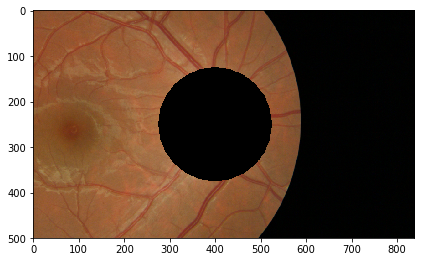

In [13]:
import csv
import os
from sklearn.metrics.cluster import entropy
with open('ImageSubsections.csv') as csvfile:
    reader = csv.DictReader(csvfile)
#     with open('OutputFile.csv','w',newline = '') as outFile:
#         writer = csv.DictWriter(outFile)
    feature_dicts = []
    count = 1
    for row in reader:
        count +=1
        imageName = row['image']
        start_x  = int(row['start_x'])
        start_y  = int(row['start_y'])
        center_x = int(row['x'])
        center_y = int(row['y'])
        DR       = row['exudates'] 
        fileLocation = 'E:/Users/Alex/Dropbox/MEng Software/Winter-Term-2019/Big Data/Project/masked images (1)/' +imageName
        
        cluster_file = 'E:/Users/Alex/Dropbox/MEng Software/Winter-Term-2019/Big Data/Project/clusters-cropped/cluster-' +imageName
        exists = os.path.isfile(cluster_file)
        if exists:
            print (imageName)
            im = imread(fileLocation)

            imgrey = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

            #dimension of subsection
            dimension_x = 600 #dimension of subsection
            dimension_y = 500 #dimension of subsection
            if start_x > 500:
                start_x -= 400
            imgrey_sub = subsection(imgrey,start_y,start_x,dimension_y,dimension_x)
            im_sub = subsection(im,start_y,start_x,dimension_y,dimension_x)
            new_center_x = center_x - start_x
            new_center_y = center_y - start_y

            #Features
            en = entropy(imgrey_sub) #feature
            l_r = leftRight(center_x) #feature

            clusterim = imread(cluster_file)
            exudateim = exudate_image(clusterim,10000)
            exudate_count = count_exudates(exudateim) #feature
            print(exudate_count)
            min_dist, max_dist, avg_dist = distances(exudateim,new_center_x,new_center_y) #3x features
            features = {'image':imageName, 'entropy':en,'left/right (1/0)':l_r,'number of exudate pixels':exudate_count,
                        'min distance from od centre':min_dist,'max distance from od centre':max_dist,
                        'average distance from od centre':avg_dist,'DR':DR}
            feature_dicts.append(features)

keys = feature_dicts[0].keys()
with open('features.csv', 'w',newline='') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(feature_dicts)
        
            
            
            

C:\Users\Alex\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


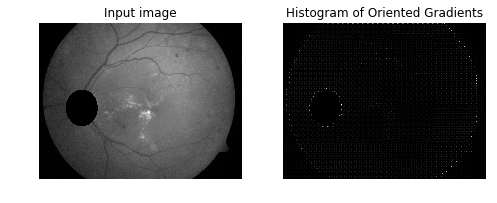

In [20]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


# image = data.astronaut()
im = imread('ODmasked-image-277.png')
image = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
fd, hog_image = hog(im, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
print(hog_image)
plt.show()

In [26]:
print(len(fd),hog_image.shape)
print(fd)

40176 (1000, 1300)
[0.         0.         0.         ... 0.         0.13576311 0.        ]


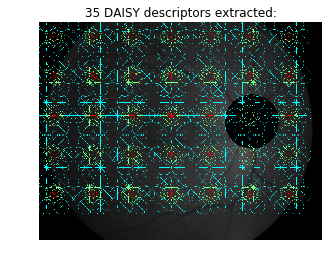

In [25]:
from skimage.feature import daisy
from skimage import data
import matplotlib.pyplot as plt

im = imread('ODmasked-image-276.png')
img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

descs, descs_img = daisy(img, step=180, radius=68, rings=2, histograms=6,
                         orientations=8, visualize=True)

fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(descs_img)
descs_num = descs.shape[0] * descs.shape[1]
ax.set_title('%i DAISY descriptors extracted:' % descs_num)
plt.show()

In [23]:
print(descs.shape)
print(descs_img.shape)
print(descs[0])

(5, 7, 104)
(1000, 1300, 3)
[[0.00578132 0.00910517 0.00560307 0.00440694 0.00741594 0.00701699
  0.00719821 0.00443399 0.00964018 0.01418207 0.0088793  0.00712919
  0.0120762  0.01146838 0.01113532 0.00712514 0.00923773 0.0136636
  0.00899022 0.00719803 0.01151857 0.01123721 0.01120724 0.00713048
  0.00630913 0.00976957 0.00647009 0.00499892 0.00790738 0.00765414
  0.00811824 0.00502275 0.00470731 0.00787032 0.00495302 0.00372746
  0.00609685 0.00587197 0.00639249 0.00382949 0.00301237 0.00490279
  0.00289194 0.00229882 0.00399497 0.00369967 0.0039196  0.0023765
  0.00516548 0.00812568 0.00480653 0.00389724 0.00672892 0.00628117
  0.00632749 0.00396039 0.01925983 0.0258933  0.01877908 0.01648607
  0.03134398 0.03900388 0.02816894 0.01552547 0.02211779 0.02941537
  0.02175983 0.02038868 0.03854019 0.04555851 0.03142154 0.01770069
  0.00777871 0.01209945 0.00812783 0.00642262 0.01043752 0.01043222
  0.01039868 0.00624569 0.00468554 0.00740485 0.00462442 0.00354648
  0.00576044 0.0055309

In [52]:
from cv2 import xfeatures2d#FeatureDetector_create
dense=cv2.xfeatures2d.SIFT_create("Dense")#cv2.FeatureDetector_create("Dense")
kp=dense.detect(img)
kp,des=sift.compute(img,kp)

ImportError: cannot import name 'xfeatures2d' from 'cv2.cv2' (C:\Users\Alex\Anaconda3\lib\site-packages\cv2\cv2.cp37-win_amd64.pyd)

In [54]:
import cv2
import numpy as np
#img = cv2.imread('home.jpg')
gray= img#cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)
img=cv2.drawKeypoints(gray,kp)
cv2.imwrite('sift_keypoints.jpg',img)

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'